In [93]:
import pandas as pd
from google.colab import files
uploaded=files.upload()


Saving ABHISHEK PANDEY - Bank_Personal_Loan_Modelling-1.csv to ABHISHEK PANDEY - Bank_Personal_Loan_Modelling-1.csv


In [94]:
import io
bank=pd.read_csv(io.BytesIO(uploaded['ABHISHEK PANDEY - Bank_Personal_Loan_Modelling-1.csv']))

In [95]:
bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [96]:
import seaborn as sns 
import statsmodels.formula.api as smf 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline

In [97]:
print(list(bank.columns))

['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [98]:
bank.shape

(5000, 14)

In [99]:
bank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [100]:
bank.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [101]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f654b277198>,
      dtype=object)

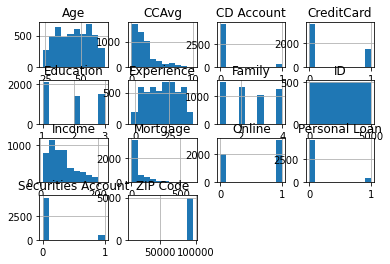

In [102]:
bank.hist()

In [103]:
#checking that  my dependent variable how much it is 1 and how much it is 0
bank['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [104]:
#check the cutoff value
bank['Personal Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [105]:
bank['Securities Account'].value_counts(normalize=True)

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

In [106]:
bank['CreditCard'].value_counts(normalize=True)

0    0.706
1    0.294
Name: CreditCard, dtype: float64

In [107]:
bank['Online'].value_counts(normalize=True)

1    0.5968
0    0.4032
Name: Online, dtype: float64

In [108]:
bank['CD Account'].value_counts(normalize=True)

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

In [109]:
bank.shape


(5000, 14)

In [110]:
y=bank.iloc[:,9]

bank1=bank
print(bank1.columns)
bank1.drop(['Personal Loan'],axis=1,inplace=True)
x=bank1
print(x.columns)                                                   


Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')
Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')


In [111]:
x2=pd.get_dummies(x,columns=['Education'])
print(x2.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Education_1', 'Education_2', 'Education_3'],
      dtype='object')


In [112]:
#Split the data into training and test set in the ratio of 70:30 respectively
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.3,random_state=5) 

In [113]:
x_test.shape

(1500, 15)

In [115]:
x_train.shape

(3500, 15)

In [116]:
bank.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231
Securities Account,-0.016972,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028


In [117]:
import statsmodels.api as sm 
model=sm.Logit(y_train,x_train)
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.116212
         Iterations 9


In [118]:
#logistic regression result
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3485
Method:                           MLE   Df Model:                           14
Date:                Thu, 18 Jun 2020   Pseudo R-squ.:                  0.6287
Time:                        18:03:16   Log-Likelihood:                -406.74
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                1.171e-285
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
ID                 -8.714e-05   6.55e-05     -1.331      0.183      -0.000    4.11e-05
Age                   -0.0472      0.080     -0.588      0.556      -0.204       0.110
Experience             0.0488      0.079      0.615      0.539      -0.107       0.205
Income                 0.0578      0.003     16.650      0.000       0.051       0.065
ZIP Code           -3.297e-05   4.51e-05     -0.731      0.465      -0.000    5.54e-05
Family                 0.6231      0.092      6.742      0.000       0.442       0.804
CCAvg                  0.1710      0.054      3.186      0.001       0.066       0.276
Mortgage               0.0005      0.001      0.696      0.486      -0.001       0.002
Securities Account    -0.7832      0.360     -2.175      0.030      -1.489      -0.077
CD Account             3.9651      0.414      9.574      0.000       3.153       4.777
Online                -0.6486      0.198     -3.269      0.001      -1.037      -0.260
CreditCard            -1.1230      0.263     -4.272      0.000      -1.638      -0.608
Education_1           -8.3135      4.677     -1.778      0.075     -17.480       0.853
Education_2           -4.5069      4.676     -0.964      0.335     -13.671       4.657
Education_3           -4.4336      4.679     -0.948      0.343     -13.604       4.737
======================================================================================
"""

In [119]:
x_test.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
27,28,46,20,158,90064,1,2.4,0,0,0,1,1,1,0,0
1482,1483,60,35,8,94143,1,0.1,0,0,0,1,0,1,0,0
3021,3022,54,28,159,90245,2,0.5,461,0,0,1,0,1,0,0
3867,3868,44,19,61,94080,3,2.7,0,0,0,0,0,0,1,0
637,638,53,28,31,90245,4,0.1,0,0,0,1,0,0,0,1


In [120]:
x_train['y_pred_class_train']=result.predict(x_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [121]:
x_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3,y_pred_class_train
2015,2016,30,5,141,95747,1,0.80,0,0,0,1,0,1,0,0,0.010449
2192,2193,25,1,13,95814,4,1.00,95,0,0,0,1,1,0,0,0.000029
2275,2276,40,16,115,94305,1,3.40,0,0,0,1,0,1,0,0,0.003992
248,249,55,29,99,92121,2,1.40,264,0,0,1,1,1,0,0,0.000934
1056,1057,36,6,25,95020,1,0.67,0,0,0,1,0,0,0,1,0.000537


In [122]:
x_train['y_pred_class_train_gp']=np.where(x_train['y_pred_class_train']>=0.096,1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [123]:
x_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3,y_pred_class_train,y_pred_class_train_gp
2015,2016,30,5,141,95747,1,0.80,0,0,0,1,0,1,0,0,0.010449,0
2192,2193,25,1,13,95814,4,1.00,95,0,0,0,1,1,0,0,0.000029,0
2275,2276,40,16,115,94305,1,3.40,0,0,0,1,0,1,0,0,0.003992,0
248,249,55,29,99,92121,2,1.40,264,0,0,1,1,1,0,0,0.000934,0
1056,1057,36,6,25,95020,1,0.67,0,0,0,1,0,0,0,1,0.000537,0


In [124]:
x_test['y_pred_class_train']=result.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [125]:
x_test['y_pred_class_train_gp']=np.where(x_test['y_pred_class_train']>=0.096,1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
x_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3,y_pred_class_train,y_pred_class_train_gp
2015,2016,30,5,141,95747,1,0.80,0,0,0,1,0,1,0,0,0.010449,0
2192,2193,25,1,13,95814,4,1.00,95,0,0,0,1,1,0,0,0.000029,0
2275,2276,40,16,115,94305,1,3.40,0,0,0,1,0,1,0,0,0.003992,0
248,249,55,29,99,92121,2,1.40,264,0,0,1,1,1,0,0,0.000934,0
1056,1057,36,6,25,95020,1,0.67,0,0,0,1,0,0,0,1,0.000537,0


In [127]:
y_train.head()

2015    0
2192    0
2275    0
248     0
1056    0
Name: Personal Loan, dtype: int64

In [128]:
#Print the confusion matrix for logistic regression model.
ct_train=pd.crosstab(y_train,x_train['y_pred_class_train_gp'])
ct_test=pd.crosstab(y_test,x_test['y_pred_class_train_gp'])
print(ct_train)
print(ct_test)

y_pred_class_train_gp     0    1
Personal Loan                   
0                      2851  318
1                        36  295
y_pred_class_train_gp     0    1
Personal Loan                   
0                      1212  139
1                        16  133


In [129]:
#print the accuracy test
accuracy_train=(295+2851)/3500
accuracy_test=(1212+133)/1500
print(accuracy_train)
print(accuracy_test)

0.8988571428571429
0.8966666666666666
